In [2]:
#Data Cleaning
import pandas as pd
import numpy as np
data = pd.read_csv("diabetic_data.csv")

In [3]:
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#try to predict if a patient is likely to be re-admitted within 30 days of discharge.
data['Output_Label'] =  (data.readmitted == '<30').astype('int')

In [5]:
def calc_prevalence(y_actual):
    return(sum(y_actual/len(y_actual)))

print('Prevalence: %.3f' %calc_prevalence(data['Output_Label'].values))

Prevalence: 0.112


In [6]:
data.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [7]:
data.shape

(101766, 51)

In [8]:
data.drop(columns=['encounter_id'], inplace=True)

In [9]:
data.shape

(101766, 50)

In [10]:
print("Summary of missing values before replacing '?':")
print(data.isnull().sum())

Summary of missing values before replacing '?':
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0


In [11]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)


In [12]:
# Display summary of missing values after replacing '?'
print("\nSummary of missing values after replacing '?':")
print(data.isnull().sum())


Summary of missing values after replacing '?':
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0


In [13]:
data.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [14]:
data['readmitted'] = data['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

In [15]:
data.shape

(101766, 50)

In [16]:
print(data.dtypes)

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [17]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
data.drop(columns=columns_to_drop, inplace=True)
data.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Output_Label
0,8222157,Caucasian,Female,[0-10),6,25,1,1,<NA>,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,0,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,<NA>,<NA>,...,Up,No,No,No,No,No,Ch,Yes,0,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,<NA>,<NA>,...,No,No,No,No,No,No,No,Yes,0,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,<NA>,<NA>,...,Up,No,No,No,No,No,Ch,Yes,0,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,<NA>,<NA>,...,Steady,No,No,No,No,No,Ch,Yes,0,0
5,82637451,Caucasian,Male,[50-60),2,1,2,3,<NA>,<NA>,...,Steady,No,No,No,No,No,No,Yes,0,0
6,84259809,Caucasian,Male,[60-70),3,1,2,4,<NA>,<NA>,...,Steady,No,No,No,No,No,Ch,Yes,0,0
7,114882984,Caucasian,Male,[70-80),1,1,7,5,<NA>,<NA>,...,No,No,No,No,No,No,No,Yes,0,0
8,48330783,Caucasian,Female,[80-90),2,1,4,13,<NA>,<NA>,...,Steady,No,No,No,No,No,Ch,Yes,0,0
9,63555939,Caucasian,Female,[90-100),3,3,4,12,<NA>,InternalMedicine,...,Steady,No,No,No,No,No,Ch,Yes,0,0


In [18]:
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                           'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 
                           'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
                           'glyburide-metformin', 'glipizide-metformin', 
                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                           'metformin-pioglitazone']


# Remove columns with near-zero variance
data.drop(columns=near_zero_variance_cols, inplace=True)

# Display the updated DataFrame
print(data.head())

   patient_nbr             race  gender      age  admission_type_id  \
0      8222157        Caucasian  Female   [0-10)                  6   
1     55629189        Caucasian  Female  [10-20)                  1   
2     86047875  AfricanAmerican  Female  [20-30)                  1   
3     82442376        Caucasian    Male  [30-40)                  1   
4     42519267        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1       <NA>   
1                         1                    7                 3       <NA>   
2                         1                    7                 2       <NA>   
3                         1                    7                 2       <NA>   
4                         1                    7                 1       <NA>   

          medical_specialty  ...  metformin  glipizide  glyburide  \
0  Pediatrics-End

In [19]:
data.dropna(inplace=True)

In [20]:
data.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,Output_Label
23879,7239654,Caucasian,Female,[70-80),1,3,6,12,UN,InternalMedicine,...,No,No,No,No,No,Steady,No,Yes,0,0
24069,14244093,Caucasian,Female,[30-40),1,1,6,13,MC,Nephrology,...,No,No,No,No,No,Steady,No,Yes,0,0
24117,537543,Caucasian,Female,[30-40),2,1,4,11,MC,Nephrology,...,No,No,No,Steady,No,Steady,Ch,Yes,0,0
24177,354474,Caucasian,Male,[70-80),2,3,1,12,MC,InternalMedicine,...,No,Down,No,No,No,No,Ch,Yes,0,0
24228,1186533,AfricanAmerican,Female,[30-40),1,1,6,6,HM,InternalMedicine,...,No,No,No,No,No,No,No,No,0,0


In [21]:
data.shape

(4166, 31)

In [22]:
data.groupby('readmitted').size()

readmitted
0    3770
1     396
dtype: int64

In [23]:
data.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     2776
2      124
3      560
4       31
5       55
6      410
7       35
8        1
9        1
11      32
13       4
14       3
18       3
19       1
22     113
23      13
24       1
28       3
dtype: int64

In [24]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [25]:
data.shape

(4126, 31)

In [43]:
data.to_csv("cleaned_data.csv", index=False)

In [27]:
data['Output_Label'] =  (data.readmitted == 1)

In [28]:
def calc_prevalence(y_actual):
    return(sum(y_actual/len(y_actual)))

print('Prevalence: %.3f' %calc_prevalence(data['Output_Label'].values))

Prevalence: 0.096


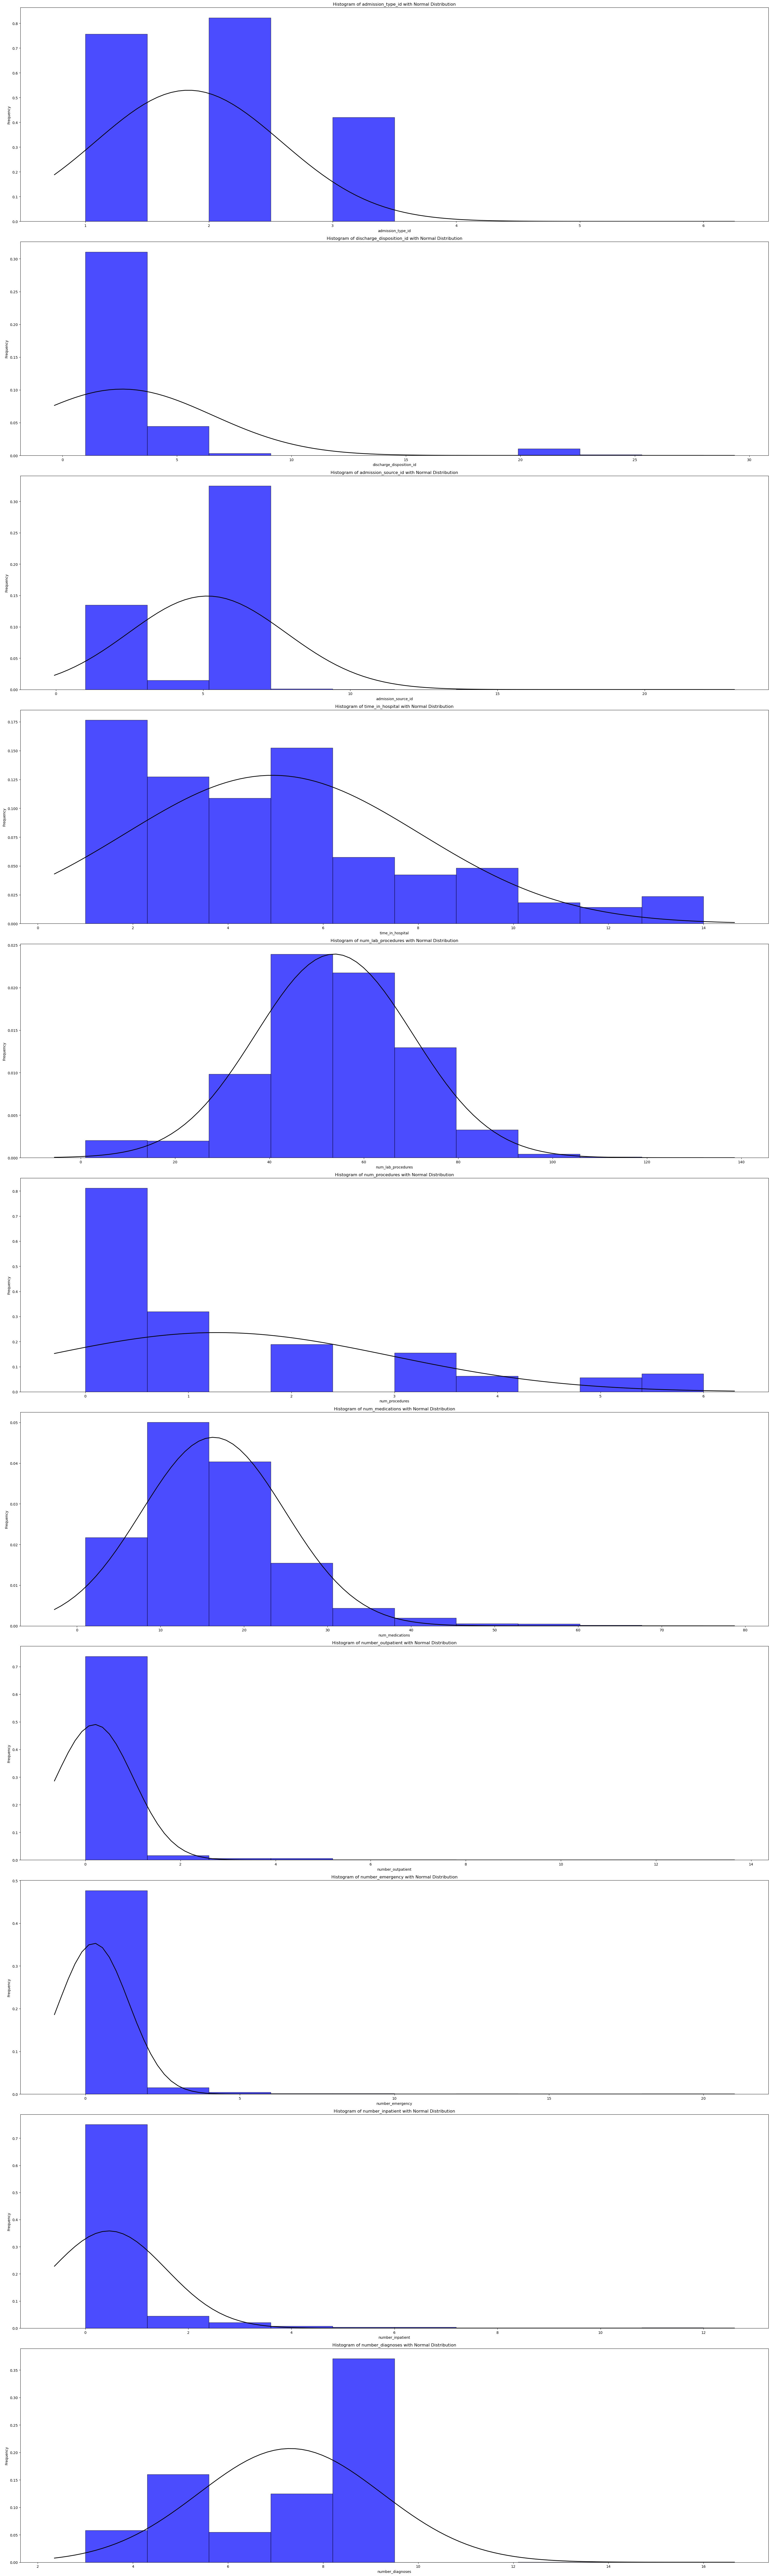

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Select features to plot
features = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create a figure and subplots (2 rows, 1 column in this case)
fig, axes = plt.subplots(11, 1, figsize=(30, 100))  # Adjust figsize as needed

# Plot histograms for each feature on separate subplots
for i, feature in enumerate(features):
    # Plot histogram
    axes[i].hist(data[feature], bins=10, color='blue', edgecolor='black', density=True, alpha=0.7)

    # Plot normal distribution curve
    mu, sigma = data[feature].mean(), data[feature].std()
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    axes[i].plot(x, p, 'k', linewidth=2)
    axes[i].set_title(f'Histogram of {feature} with Normal Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Calculate the Interquartile Range (IQR) for the 'num_lab_procedures' column
Q1 = data['num_lab_procedures'].quantile(0.25)
Q3 = data['num_lab_procedures'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier_indices = (data['num_lab_procedures'] < lower_bound) | (data['num_lab_procedures'] > upper_bound)

# Remove outliers from the DataFrame
data = data[~outlier_indices]

# Print the DataFrame after removing outliers
print(data.shape)


(4012, 31)


In [31]:
from scipy import stats

# Define a threshold for Z-scores
zscore_threshold = 3

# List of columns for which you want to remove outliers using Z-scores
columns_to_remove_outliers = [ 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient',
                              'number_emergency', 'number_inpatient', 'number_diagnoses']

# Calculate Z-scores and remove outliers for each column
for column in columns_to_remove_outliers:
    # Calculate Z-scores for the current column
    z_scores = stats.zscore(data[column])
    
    # Identify outliers using the threshold
    outlier_indices = np.abs(z_scores) > zscore_threshold
    
    # Remove outliers from the DataFrame
    data = data[~outlier_indices]

# Print the DataFrame after removing outliers
data.shape


(3754, 31)

# Data Visualization

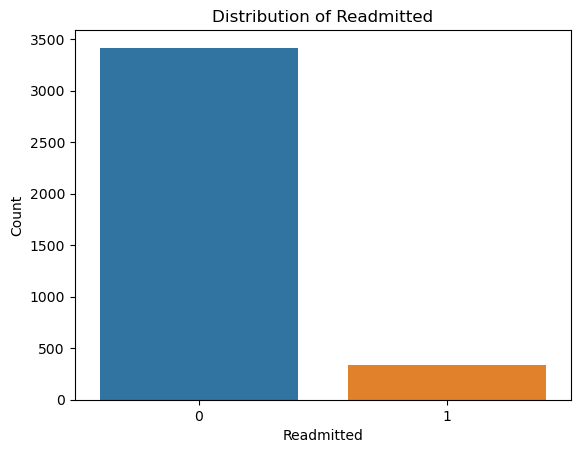

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Plot the distribution of unique classes of the target variable 'readmitted'
sns.countplot(x='readmitted', data=data)

# Add labels and title
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Distribution of Readmitted')

# Show the plot
plt.show()

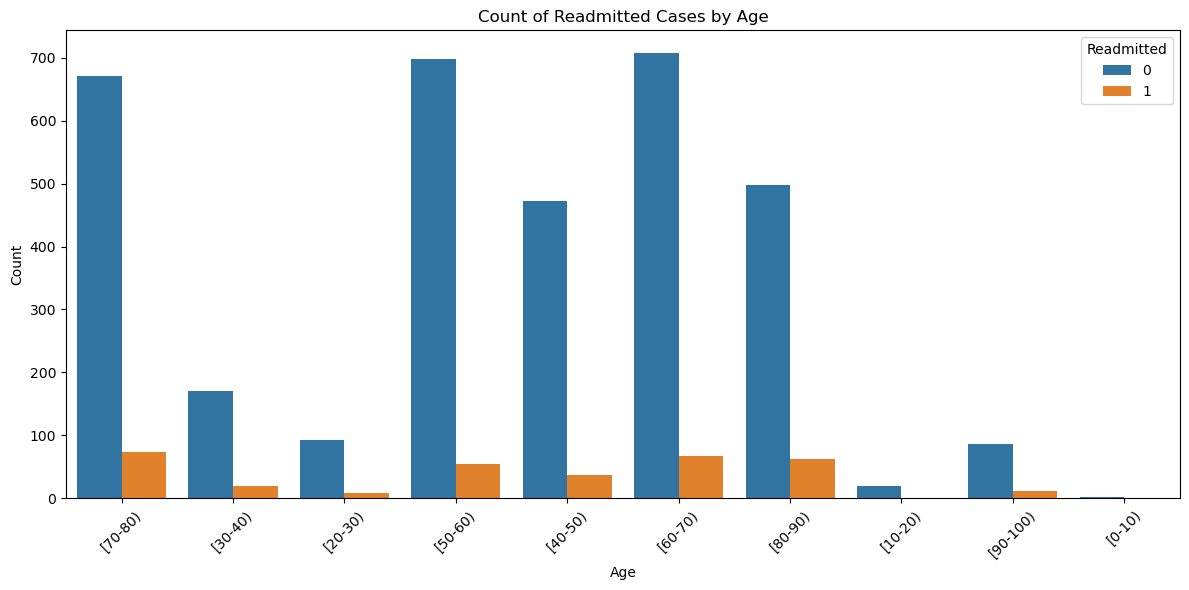

In [33]:
plt.figure(figsize=(12, 6))  # Adjust figsize as needed
sns.countplot(x='age', hue='readmitted', data=data)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Readmitted Cases by Age')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Readmitted', loc='upper right')  # Add legend
plt.tight_layout()  # Adjust layout
plt.show()

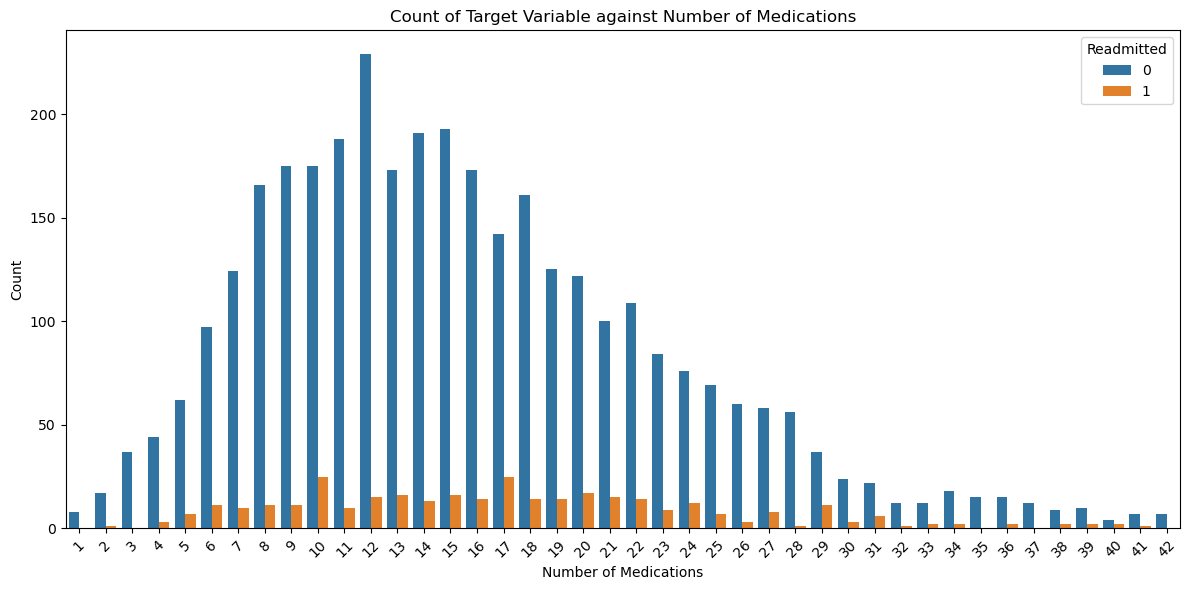

In [34]:
plt.figure(figsize=(12, 6))  # Adjust figsize as needed
sns.countplot(x='num_medications', hue='readmitted', data=data)

# Add labels and title
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Count of Target Variable against Number of Medications')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Readmitted', loc='upper right')  # Add legend
plt.tight_layout()  # Adjust layout
plt.show()

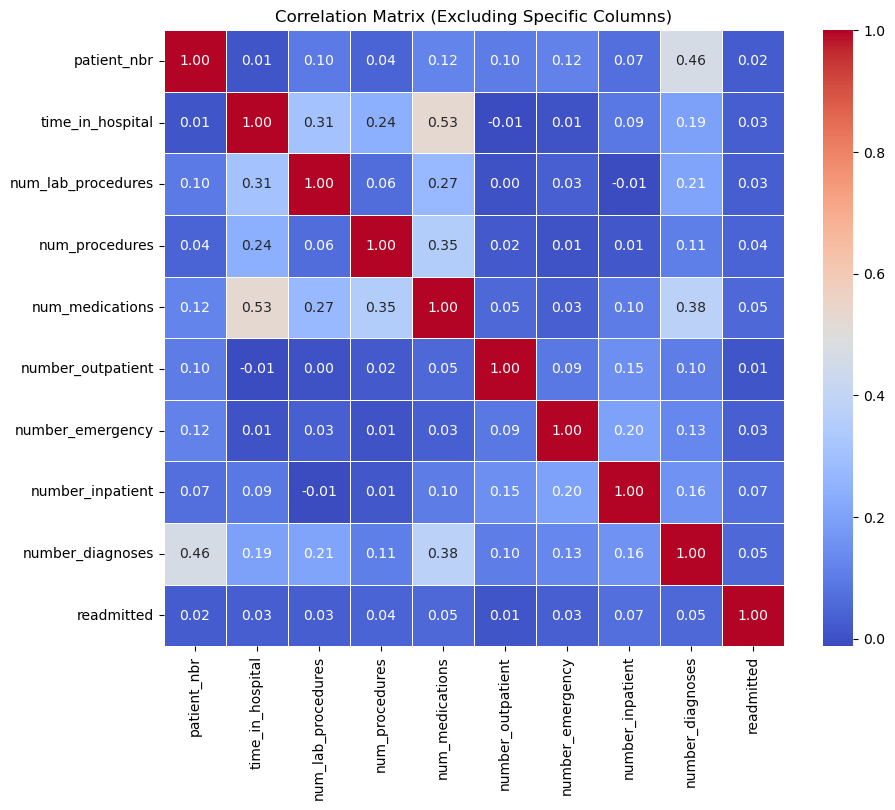

In [35]:
# Selecting only numeric columns
numeric_df = data.select_dtypes(include=['number'])
 
# Calculating correlation matrix excluding specific columns
columns_to_exclude = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
correlation_matrix = numeric_df.drop(columns_to_exclude, axis=1).corr()
 
# Creating a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Excluding Specific Columns)')
plt.show()

# Model Building

In [36]:
num_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                   'num_medications', 'number_outpatient', 'number_emergency', 
                   'number_inpatient', 'number_diagnoses']
data[num_features].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [37]:
data.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change                      object
diabetesMed         

In [38]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in the selected categorical data
encoded_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
for column in categorical_columns:
    encoded_data[column] = label_encoder.fit_transform(data[column])

# Display the encoded data
print("Encoded Data:")
print(encoded_data.head())

Encoded Data:
       patient_nbr  race  gender  age  admission_type_id  \
23879      7239654     2       0    7                  1   
24069     14244093     2       0    3                  1   
24117       537543     2       0    3                  2   
24177       354474     2       1    7                  2   
24228      1186533     0       0    3                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
23879                         3                    6                12   
24069                         1                    6                13   
24117                         1                    4                11   
24177                         3                    1                12   
24228                         1                    6                 6   

       payer_code  medical_specialty  ...  metformin  glipizide  glyburide  \
23879          14                 10  ...          1          1          1   
24069           6       

In [39]:
dummy_data = pd.DataFrame(data.copy())

In [40]:
dummy_data = pd.concat([dummy_data.drop(columns=encoded_data.columns, errors='ignore'), encoded_data], axis=1)
dummy_data.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,Output_Label
23879,7239654,2,0,7,1,3,6,12,14,10,...,1,1,1,1,1,2,1,1,0,False
24069,14244093,2,0,3,1,1,6,13,6,11,...,1,1,1,1,1,2,1,1,0,False
24117,537543,2,0,3,2,1,4,11,6,11,...,1,1,1,2,1,2,0,1,0,False
24177,354474,2,1,7,2,3,1,12,6,10,...,1,0,1,1,1,1,0,1,0,False
24228,1186533,0,0,3,1,1,6,6,5,10,...,1,1,1,1,1,1,1,0,0,False


Arbitrary Seed: Any integer value can be used for random_state. The value itself doesn't affect the randomness; it just acts as a seed to initialize the random number generator.

The Hitchhiker's Guide Reference: The popularity of 42 stems from a science fiction comedy series, "The Hitchhiker's Guide to the Galaxy" by Douglas Adams. In the book, a supercomputer named Deep Thought calculates the answer to the "ultimate question of life, the universe, and everything" as 42. Data scientists and programmers, with a touch of humor, adopted 42 as a common seed for randomness.

In [41]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
# X should contain all the features, including the encoded categorical features
# y should contain the target variable

X = dummy_data.drop(columns=['readmitted'])
y = dummy_data['readmitted']
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (3003, 30) Target: (3003,)
Test set - Features: (751, 30) Target: (751,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined (from the previous step)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9161118508655126
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       688
           1       0.00      0.00      0.00        63

    accuracy                           0.92       751
   macro avg       0.46      0.50      0.48       751
weighted avg       0.84      0.92      0.88       751



C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
